In [1]:
from altaipony.lcio import from_mast
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.6f' % x)
%matplotlib inline

In [2]:
df = pd.read_csv("C:\Vs_code_projects\mdwarf_flares\epic_catalogue.csv")

<>:1: DeprecationWarning: invalid escape sequence '\V'
<>:1: DeprecationWarning: invalid escape sequence '\V'
C:\Users\thoma\AppData\Local\Temp\ipykernel_11696\3456439302.py:1: DeprecationWarning: invalid escape sequence '\V'
  df = pd.read_csv("C:\Vs_code_projects\mdwarf_flares\epic_catalogue.csv")


In [3]:
df.loc[595]

Unnamed: 0                          595.000000
EPIC ID                       211307660.000000
Teff                               4057.239000
logg                                  4.673300
Flare #                              94.000000
Observation time                     74.800757
Average flare duration                0.278002
Longest flare duration                1.430217
Shortest flare duration               0.081727
Average percentage increase         160.305139
Highest percentage increase         431.990051
Lowest percentage increase            2.409720
Name: 595, dtype: float64

In [4]:
flc = from_mast("211307660", mode="LC", mission="K2")

6% (211/3657) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
6% (211/3657) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

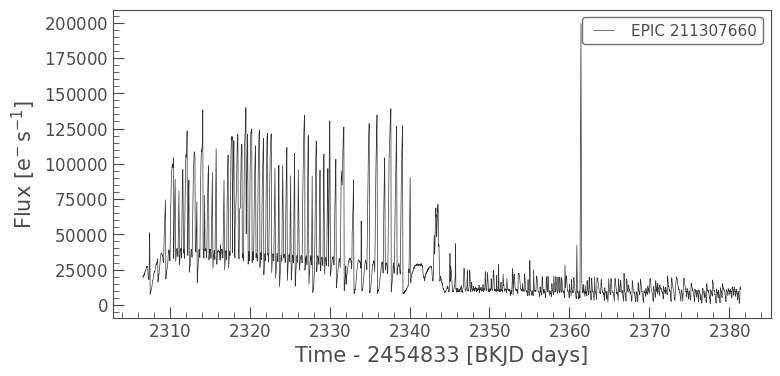

In [5]:
flc.plot()

In [6]:
flc = flc.detrend("savgol")

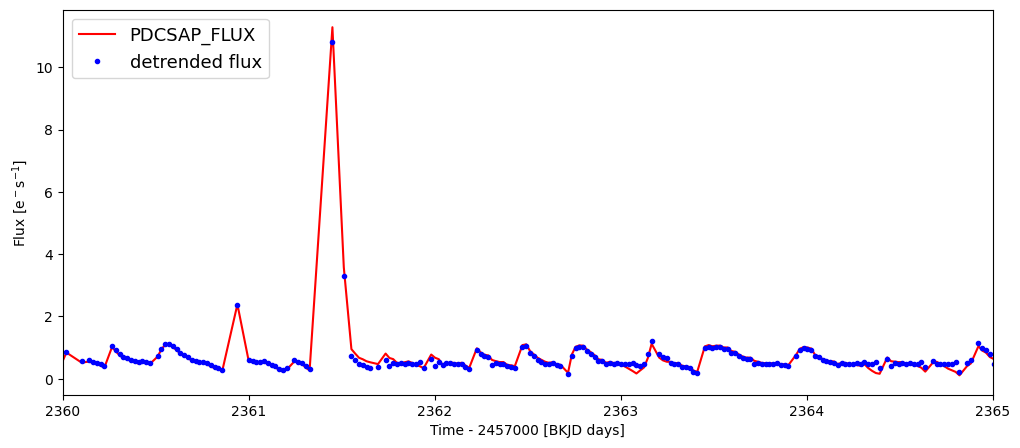

In [12]:
plt.figure(figsize=(12,5))
plt.plot(flc.time.value, flc.flux / np.nanmedian(flc.flux), "r", label="PDCSAP_FLUX")
plt.plot(flc.time.value, flc.detrended_flux / np.nanmedian(flc.detrended_flux), "b.", label="detrended flux")
plt.xlabel("Time - 2457000 [BKJD days]")
plt.ylabel(r"Flux [e$^-$s$^{-1}$]")
plt.xlim(2360, 2365)
#plt.ylim(.95,1.2)
plt.legend(loc=2,fontsize=13);

In [14]:
test.flares

,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,dur,total_n_valid_data_points
0,125,137,107681,107694,2309.246440,2309.512057,23035.19366359302,3.299696684700339,1.5522327423095703,0.265617,3336.000000
1,164,194,107721,107754,2310.063723,2310.737981,88522.16433194643,5.857629437209592,2.3248696327209473,0.674258,3336.000000
2,209,215,107769,107778,2311.044461,2311.228350,16231.398831499911,3.8886532320820915,1.5296740531921387,0.183888,3336.000000
3,228,269,107791,107838,2311.493966,2312.454271,120792.53570440141,6.669218380383512,3.1147689819335938,0.960305,3336.000000
4,287,304,107856,107874,2312.822047,2313.189823,56956.83642735413,4.438226689631481,2.4383509159088135,0.367776,3336.000000
...,...,...,...,...,...,...,...,...,...,...,...
89,3164,3168,111030,111034,2377.672422,2377.754149,1619.1543180857075,2.7764872348037515,0.3295048475265503,0.081728,3336.000000
90,3175,3182,111042,111049,2377.917604,2378.060627,7150.9592261037205,4.163522995651775,0.8533395528793335,0.143023,3336.000000
91,3198,3202,111066,111070,2378.407969,2378.489696,1643.6533354844846,2.763415416154294,0.38189399242401123,0.081727,3336.000000
92,3220,3224,111090,111094,2378.898333,2378.980061,1815.3700122847624,2.7118066801535723,0.4528992176055908,0.081727,3336.000000


In [8]:
test = flc.find_flares(N1 = 3, N2 = 3, N3 = 4)

Found 5 candidate(s) in the (0,309) gap.
Found 9 candidate(s) in the (309,517) gap.
Found 0 candidate(s) in the (517,534) gap.
Found 0 candidate(s) in the (534,771) gap.
Found 3 candidate(s) in the (771,853) gap.
Found 9 candidate(s) in the (853,1086) gap.
Found 11 candidate(s) in the (1086,1651) gap.
Found 32 candidate(s) in the (1651,2431) gap.
Found 25 candidate(s) in the (2431,3336) gap.
C:\Users\thoma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\altaipony\altai.py:210: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lc.flares = pd.concat([lc.flares, new], ignore_index=True)
